In [1]:
import os
import sys

os.chdir("../..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Import custom FFNN implementation
import os
import sys
# Add the parent directory to path to import your modules
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from lib.neural import NeuralNetwork, NetworkLayer
from lib.ffnn import FFNN
from lib.activation import ReLU, Sigmoid, Tanh, Linear, Softmax
from lib.loss import MSE, BCE, CCE
from lib.weight_initializer import ZeroInitializer, UniformInitializer, NormalInitializer


INFO:root:Loading data


Sparsity with L1 penalty: 77.69%
Test score with L1 penalty: 0.8250
Example run in 12.715 s


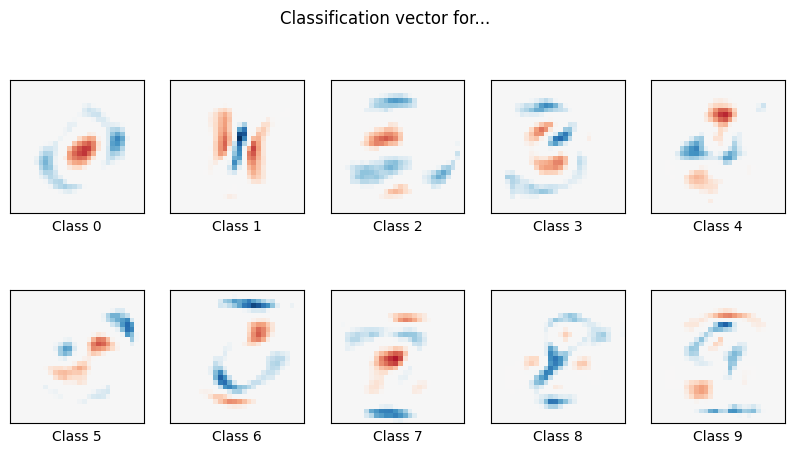

In [4]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import logging

logging.basicConfig(level=logging.INFO)

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
logging.info("Loading data")
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [5]:
# Preprocess data for FFNN
from sklearn.preprocessing import OneHotEncoder

# Load data (using your already loaded data)
# X_train and X_test are already loaded and scaled

# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train_ffnn, X_val, y_train_ffnn, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

print(f"Training set: {X_train_ffnn.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


In [6]:
# Helper functions for evaluation and visualization
def evaluate_model(model, X, y_onehot):
    """Evaluate model accuracy on given data."""
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_onehot, axis=1)
    accuracy = np.mean(predicted_classes == true_classes)
    return accuracy

def plot_train_history(history, title="Training History"):
    """Plot training and validation loss history."""
    plt.figure(figsize=(10, 5))
    plt.plot(history['train_loss'], label='Training Loss')
    if 'val_loss' in history and history['val_loss']:
        plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

Testing width variations...

Width Variation 1: [784, 32, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 204.92it/s, loss=10.9385]


Epoch 1/5 - 0.64s - loss: 10.9385 - val_loss: 10.4059


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 249.00it/s, loss=9.9646]


Epoch 2/5 - 0.52s - loss: 9.9646 - val_loss: 9.5034


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 301.95it/s, loss=9.1279]


Epoch 3/5 - 0.43s - loss: 9.1279 - val_loss: 8.7204


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 278.40it/s, loss=8.3956]


Epoch 4/5 - 0.47s - loss: 8.3956 - val_loss: 8.0375


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 240.59it/s, loss=7.7552]


Epoch 5/5 - 0.54s - loss: 7.7552 - val_loss: 7.4446
Test accuracy: 0.1849

Width Variation 2: [784, 128, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 198.08it/s, loss=21.8241]


Epoch 1/5 - 0.65s - loss: 21.8241 - val_loss: 20.8821


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 189.69it/s, loss=19.7172]


Epoch 2/5 - 0.68s - loss: 19.7172 - val_loss: 18.8830


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 205.25it/s, loss=17.8399]


Epoch 3/5 - 0.64s - loss: 17.8399 - val_loss: 17.1343


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 159.53it/s, loss=16.2355]


Epoch 4/5 - 0.81s - loss: 16.2355 - val_loss: 15.6544


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 201.98it/s, loss=14.8981]


Epoch 5/5 - 0.64s - loss: 14.8981 - val_loss: 14.3731
Test accuracy: 0.2353

Width Variation 3: [784, 512, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:01<00:00, 63.71it/s, loss=25.2376]


Epoch 1/5 - 2.01s - loss: 25.2376 - val_loss: 23.2515


Epoch 2/5: 100%|██████████| 125/125 [00:01<00:00, 65.38it/s, loss=22.8864]


Epoch 2/5 - 1.96s - loss: 22.8864 - val_loss: 21.3532


Epoch 3/5: 100%|██████████| 125/125 [00:01<00:00, 65.17it/s, loss=21.1424]


Epoch 3/5 - 1.96s - loss: 21.1424 - val_loss: 19.7833


Epoch 4/5: 100%|██████████| 125/125 [00:01<00:00, 66.87it/s, loss=19.6724]


Epoch 4/5 - 1.92s - loss: 19.6724 - val_loss: 18.3769


Epoch 5/5: 100%|██████████| 125/125 [00:01<00:00, 67.64it/s, loss=18.4144]


Epoch 5/5 - 1.90s - loss: 18.4144 - val_loss: 17.1460


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Test accuracy: 0.3278


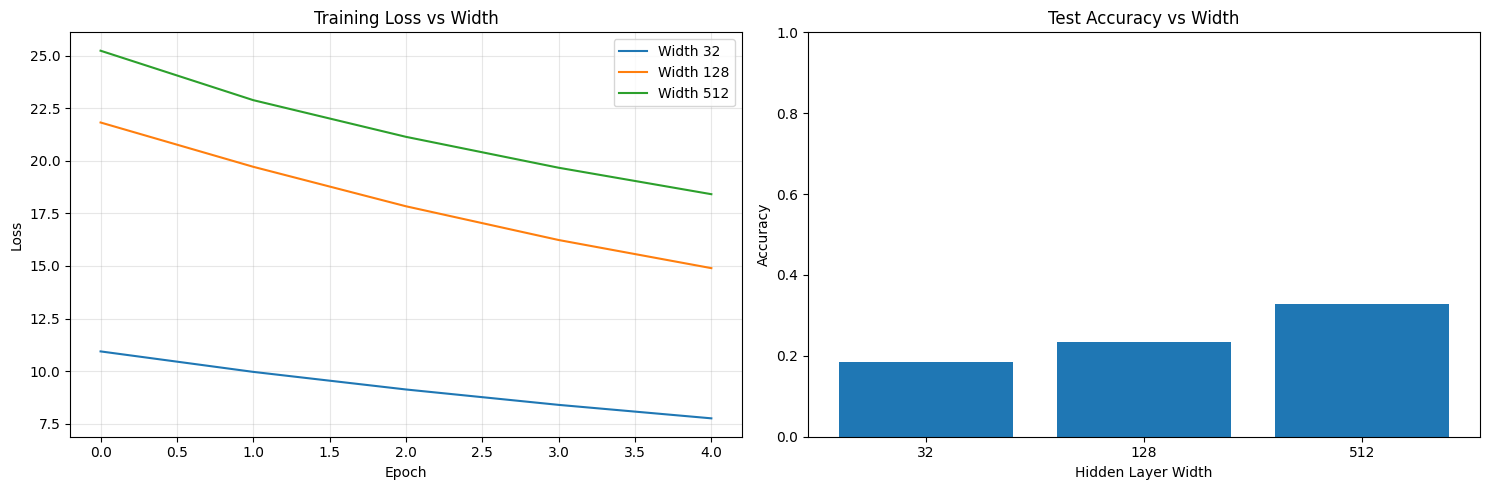


Testing depth variations...

Depth Variation 1: [784, 64, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 239.00it/s, loss=15.6996]


Epoch 1/5 - 0.54s - loss: 15.6996 - val_loss: 14.6294


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 266.52it/s, loss=14.0655]


Epoch 2/5 - 0.49s - loss: 14.0655 - val_loss: 13.1240


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 226.04it/s, loss=12.5840]


Epoch 3/5 - 0.58s - loss: 12.5840 - val_loss: 11.7210


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 240.38it/s, loss=11.2557]


Epoch 4/5 - 0.55s - loss: 11.2557 - val_loss: 10.4900


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 251.51it/s, loss=10.1033]


Epoch 5/5 - 0.52s - loss: 10.1033 - val_loss: 9.4324
Test accuracy: 0.2308

Depth Variation 2: [784, 64, 64, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 217.77it/s, loss=22.3958]


Epoch 1/5 - 0.60s - loss: 22.3958 - val_loss: 21.6109


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 262.05it/s, loss=20.2180]


Epoch 2/5 - 0.50s - loss: 20.2180 - val_loss: 19.7812


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 210.08it/s, loss=18.4657]


Epoch 3/5 - 0.63s - loss: 18.4657 - val_loss: 18.0847


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 225.64it/s, loss=16.6911]


Epoch 4/5 - 0.58s - loss: 16.6911 - val_loss: 16.2903


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 190.84it/s, loss=14.8714]


Epoch 5/5 - 0.67s - loss: 14.8714 - val_loss: 14.4450
Test accuracy: 0.2720

Depth Variation 3: [784, 64, 64, 64, 10]


Epoch 1/5: 100%|██████████| 125/125 [00:00<00:00, 247.03it/s, loss=23.9377]


Epoch 1/5 - 0.52s - loss: 23.9377 - val_loss: 22.6992


Epoch 2/5: 100%|██████████| 125/125 [00:00<00:00, 198.15it/s, loss=21.7913]


Epoch 2/5 - 0.66s - loss: 21.7913 - val_loss: 21.1875


Epoch 3/5: 100%|██████████| 125/125 [00:00<00:00, 213.38it/s, loss=20.3651]


Epoch 3/5 - 0.61s - loss: 20.3651 - val_loss: 19.9610


Epoch 4/5: 100%|██████████| 125/125 [00:00<00:00, 193.80it/s, loss=19.1708]


Epoch 4/5 - 0.67s - loss: 19.1708 - val_loss: 18.7991


Epoch 5/5: 100%|██████████| 125/125 [00:00<00:00, 227.69it/s, loss=17.7923]
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Epoch 5/5 - 0.58s - loss: 17.7923 - val_loss: 16.8018
Test accuracy: 0.3326


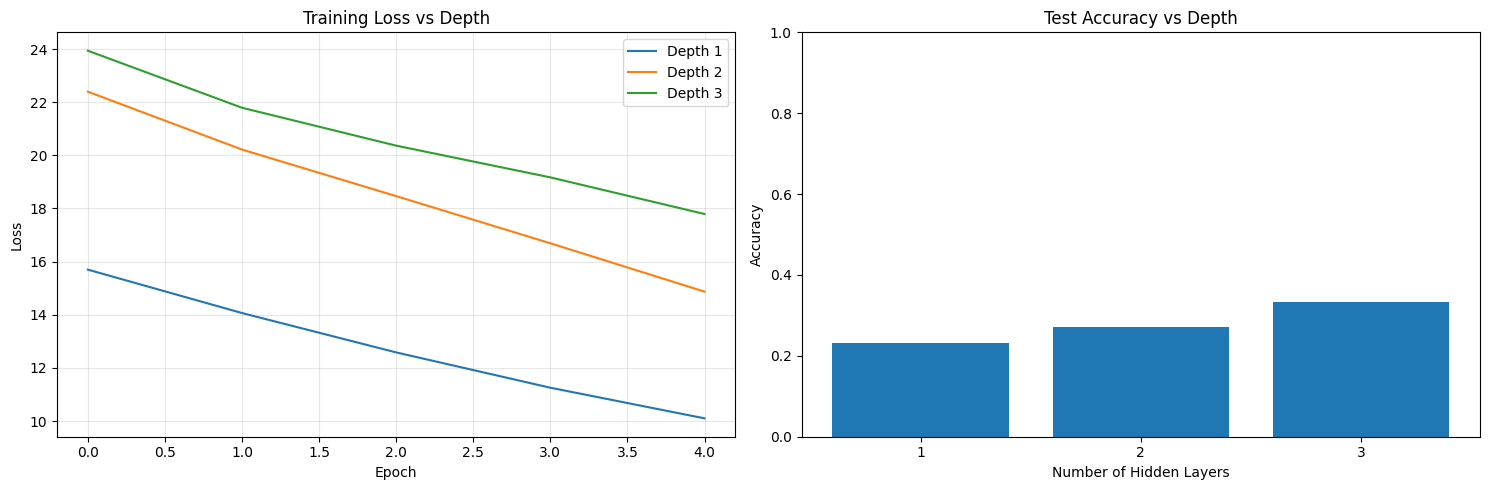

In [ ]:
# Define base configuration
base_config = {
    'learning_rate': 0.1,
    'batch_size': 32,
    'epochs': 5,  # Using fewer epochs for faster testing
    'loss_function': CCE(),
    'activation': Sigmoid(),
    'initializer': NormalInitializer(seed=42)
}

# Define different architectures for width variation (fixed depth)
width_variations = [
    [784, 32, 10],         # Narrow
    [784, 128, 10],        # Medium
    [784, 512, 10]         # Wide
]

# Define different architectures for depth variation (fixed width)
depth_variations = [
    [784, 64, 10],               # Shallow (1 hidden layer)
    [784, 64, 64, 10],           # Medium (2 hidden layers)
    [784, 64, 64, 64, 10]        # Deep (3 hidden layers)
]

# Test width variations
width_histories = []
width_accuracies = []

print("Testing width variations...")
for i, architecture in enumerate(width_variations):
    print(f"\nWidth Variation {i+1}: {architecture}")
    
    # Create activations list (output layer uses Softmax)
    activations = [base_config['activation']] * (len(architecture) - 2) + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_method=base_config['initializer']
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'],
        validation_data=(X_val, y_val),
        learning_rate=base_config['learning_rate'],
        verbose=1
    )
    
    # Store results
    width_histories.append(history)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    width_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot results for width variations
plt.figure(figsize=(15, 5))

# Plot width variation loss
plt.subplot(1, 2, 1)
for i, history in enumerate(width_histories):
    plt.plot(history['train_loss'], label=f"Width {width_variations[i][1]}")
plt.title('Training Loss vs Width')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare test accuracies for width
plt.subplot(1, 2, 2)
plt.bar([str(arch[1]) for arch in width_variations], width_accuracies)
plt.title('Test Accuracy vs Width')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Test depth variations
depth_histories = []
depth_accuracies = []

print("\nTesting depth variations...")
for i, architecture in enumerate(depth_variations):
    print(f"\nDepth Variation {i+1}: {architecture}")
    
    # Create activations list (output layer uses Softmax)
    activations = [base_config['activation']] * (len(architecture) - 2) + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_method=base_config['initializer']
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'],
        validation_data=(X_val, y_val),
        learning_rate=base_config['learning_rate'],
        verbose=1
    )
    
    # Store results
    depth_histories.append(history)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    depth_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot results for depth variations
plt.figure(figsize=(15, 5))

# Plot depth variation loss
plt.subplot(1, 2, 1)
for i, history in enumerate(depth_histories):
    plt.plot(history['train_loss'], label=f"Depth {len(depth_variations[i]) - 2}")
plt.title('Training Loss vs Depth')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Compare test accuracies for depth
plt.subplot(1, 2, 2)
plt.bar([str(len(arch) - 2) for arch in depth_variations], depth_accuracies)
plt.title('Test Accuracy vs Depth')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

Testing activation functions...

Activation: <lib.activation.Linear object at 0x00000189D94232C0>


Epoch 1/25:   0%|          | 0/125 [00:00<?, ?it/s, loss=0.4666]

Epoch 1/25: 100%|██████████| 125/125 [00:00<00:00, 156.25it/s, loss=24.7551]


Epoch 1/25 - 0.83s - loss: 24.7551 - val_loss: 23.6680


Epoch 2/25: 100%|██████████| 125/125 [00:00<00:00, 152.44it/s, loss=22.3344]


Epoch 2/25 - 0.86s - loss: 22.3344 - val_loss: 21.4966


Epoch 3/25: 100%|██████████| 125/125 [00:00<00:00, 186.21it/s, loss=20.2666]


Epoch 3/25 - 0.70s - loss: 20.2666 - val_loss: 19.5826


Epoch 4/25: 100%|██████████| 125/125 [00:00<00:00, 199.35it/s, loss=18.5039]


Epoch 4/25 - 0.67s - loss: 18.5039 - val_loss: 17.9857


Epoch 5/25: 100%|██████████| 125/125 [00:00<00:00, 222.02it/s, loss=17.0403]


Epoch 5/25 - 0.58s - loss: 17.0403 - val_loss: 16.6714


Epoch 6/25: 100%|██████████| 125/125 [00:00<00:00, 229.78it/s, loss=15.8062]


Epoch 6/25 - 0.57s - loss: 15.8062 - val_loss: 15.5041


Epoch 7/25: 100%|██████████| 125/125 [00:00<00:00, 200.96it/s, loss=14.6927]


Epoch 7/25 - 0.65s - loss: 14.6927 - val_loss: 14.4030


Epoch 8/25: 100%|██████████| 125/125 [00:00<00:00, 200.79it/s, loss=13.6455]


Epoch 8/25 - 0.65s - loss: 13.6455 - val_loss: 13.3827


Epoch 9/25: 100%|██████████| 125/125 [00:00<00:00, 233.24it/s, loss=12.6605]


Epoch 9/25 - 0.55s - loss: 12.6605 - val_loss: 12.4447


Epoch 10/25: 100%|██████████| 125/125 [00:00<00:00, 210.89it/s, loss=11.7798]


Epoch 10/25 - 0.62s - loss: 11.7798 - val_loss: 11.5833


Epoch 11/25: 100%|██████████| 125/125 [00:00<00:00, 221.24it/s, loss=10.9903]


Epoch 11/25 - 0.58s - loss: 10.9903 - val_loss: 10.7722


Epoch 12/25: 100%|██████████| 125/125 [00:00<00:00, 180.11it/s, loss=10.2810]


Epoch 12/25 - 0.71s - loss: 10.2810 - val_loss: 10.0673


Epoch 13/25: 100%|██████████| 125/125 [00:00<00:00, 221.61it/s, loss=9.6514]


Epoch 13/25 - 0.59s - loss: 9.6514 - val_loss: 9.4557


Epoch 14/25: 100%|██████████| 125/125 [00:00<00:00, 235.25it/s, loss=9.0883]


Epoch 14/25 - 0.55s - loss: 9.0883 - val_loss: 8.9185


Epoch 15/25: 100%|██████████| 125/125 [00:00<00:00, 231.19it/s, loss=8.6015]


Epoch 15/25 - 0.57s - loss: 8.6015 - val_loss: 8.4543


Epoch 16/25: 100%|██████████| 125/125 [00:00<00:00, 197.47it/s, loss=8.1647]


Epoch 16/25 - 0.73s - loss: 8.1647 - val_loss: 8.0381


Epoch 17/25: 100%|██████████| 125/125 [00:00<00:00, 179.08it/s, loss=7.7663]


Epoch 17/25 - 0.74s - loss: 7.7663 - val_loss: 7.6715


Epoch 18/25: 100%|██████████| 125/125 [00:00<00:00, 230.63it/s, loss=7.4072]


Epoch 18/25 - 0.56s - loss: 7.4072 - val_loss: 7.3472


Epoch 19/25: 100%|██████████| 125/125 [00:00<00:00, 211.51it/s, loss=7.0856]


Epoch 19/25 - 0.61s - loss: 7.0856 - val_loss: 7.0636


Epoch 20/25: 100%|██████████| 125/125 [00:00<00:00, 220.07it/s, loss=6.7995]


Epoch 20/25 - 0.59s - loss: 6.7995 - val_loss: 6.8115


Epoch 21/25: 100%|██████████| 125/125 [00:00<00:00, 195.61it/s, loss=6.5389]


Epoch 21/25 - 0.66s - loss: 6.5389 - val_loss: 6.5794


Epoch 22/25: 100%|██████████| 125/125 [00:00<00:00, 226.03it/s, loss=6.3013]


Epoch 22/25 - 0.57s - loss: 6.3013 - val_loss: 6.3668


Epoch 23/25: 100%|██████████| 125/125 [00:00<00:00, 210.79it/s, loss=6.0863]


Epoch 23/25 - 0.62s - loss: 6.0863 - val_loss: 6.1642


Epoch 24/25: 100%|██████████| 125/125 [00:00<00:00, 177.05it/s, loss=5.8899]


Epoch 24/25 - 0.73s - loss: 5.8899 - val_loss: 5.9686


Epoch 25/25: 100%|██████████| 125/125 [00:00<00:00, 188.25it/s, loss=5.7069]


Epoch 25/25 - 0.69s - loss: 5.7069 - val_loss: 5.7865
Test accuracy: 0.6681

Activation: <lib.activation.ReLU object at 0x00000189D9423E90>


Epoch 1/25: 100%|██████████| 125/125 [00:00<00:00, 217.77it/s, loss=21.8214]


Epoch 1/25 - 0.59s - loss: 21.8214 - val_loss: 20.8725


Epoch 2/25: 100%|██████████| 125/125 [00:00<00:00, 187.41it/s, loss=19.7279]


Epoch 2/25 - 0.69s - loss: 19.7279 - val_loss: 18.9142


Epoch 3/25: 100%|██████████| 125/125 [00:00<00:00, 195.62it/s, loss=17.8669]


Epoch 3/25 - 0.67s - loss: 17.8669 - val_loss: 17.1693


Epoch 4/25: 100%|██████████| 125/125 [00:00<00:00, 177.31it/s, loss=16.2642]


Epoch 4/25 - 0.73s - loss: 16.2642 - val_loss: 15.6886


Epoch 5/25: 100%|██████████| 125/125 [00:00<00:00, 155.09it/s, loss=14.9239]


Epoch 5/25 - 0.83s - loss: 14.9239 - val_loss: 14.3981


Epoch 6/25: 100%|██████████| 125/125 [00:00<00:00, 205.25it/s, loss=13.7433]


Epoch 6/25 - 0.63s - loss: 13.7433 - val_loss: 13.2593


Epoch 7/25: 100%|██████████| 125/125 [00:00<00:00, 172.41it/s, loss=12.7063]


Epoch 7/25 - 0.75s - loss: 12.7063 - val_loss: 12.2532


Epoch 8/25: 100%|██████████| 125/125 [00:00<00:00, 192.02it/s, loss=11.7895]


Epoch 8/25 - 0.68s - loss: 11.7895 - val_loss: 11.3584


Epoch 9/25: 100%|██████████| 125/125 [00:00<00:00, 200.00it/s, loss=10.9694]


Epoch 9/25 - 0.65s - loss: 10.9694 - val_loss: 10.5707


Epoch 10/25: 100%|██████████| 125/125 [00:00<00:00, 165.35it/s, loss=10.2309]


Epoch 10/25 - 0.77s - loss: 10.2309 - val_loss: 9.8713


Epoch 11/25: 100%|██████████| 125/125 [00:00<00:00, 177.31it/s, loss=9.5667]


Epoch 11/25 - 0.73s - loss: 9.5667 - val_loss: 9.2466


Epoch 12/25: 100%|██████████| 125/125 [00:00<00:00, 192.60it/s, loss=8.9741]


Epoch 12/25 - 0.67s - loss: 8.9741 - val_loss: 8.7006


Epoch 13/25: 100%|██████████| 125/125 [00:00<00:00, 215.89it/s, loss=8.4451]


Epoch 13/25 - 0.61s - loss: 8.4451 - val_loss: 8.2120


Epoch 14/25: 100%|██████████| 125/125 [00:00<00:00, 205.25it/s, loss=7.9761]


Epoch 14/25 - 0.63s - loss: 7.9761 - val_loss: 7.7817


Epoch 15/25: 100%|██████████| 125/125 [00:00<00:00, 217.39it/s, loss=7.5554]


Epoch 15/25 - 0.60s - loss: 7.5554 - val_loss: 7.3911


Epoch 16/25: 100%|██████████| 125/125 [00:00<00:00, 172.88it/s, loss=7.1783]


Epoch 16/25 - 0.75s - loss: 7.1783 - val_loss: 7.0374


Epoch 17/25: 100%|██████████| 125/125 [00:00<00:00, 213.70it/s, loss=6.8388]


Epoch 17/25 - 0.62s - loss: 6.8388 - val_loss: 6.7143


Epoch 18/25: 100%|██████████| 125/125 [00:00<00:00, 210.75it/s, loss=6.5344]


Epoch 18/25 - 0.61s - loss: 6.5344 - val_loss: 6.4310


Epoch 19/25: 100%|██████████| 125/125 [00:00<00:00, 213.41it/s, loss=6.2585]


Epoch 19/25 - 0.60s - loss: 6.2585 - val_loss: 6.1757


Epoch 20/25: 100%|██████████| 125/125 [00:00<00:00, 188.60it/s, loss=6.0087]


Epoch 20/25 - 0.69s - loss: 6.0087 - val_loss: 5.9441


Epoch 21/25: 100%|██████████| 125/125 [00:00<00:00, 206.25it/s, loss=5.7810]


Epoch 21/25 - 0.63s - loss: 5.7810 - val_loss: 5.7326


Epoch 22/25: 100%|██████████| 125/125 [00:00<00:00, 207.99it/s, loss=5.5712]


Epoch 22/25 - 0.62s - loss: 5.5712 - val_loss: 5.5426


Epoch 23/25: 100%|██████████| 125/125 [00:00<00:00, 205.99it/s, loss=5.3768]


Epoch 23/25 - 0.63s - loss: 5.3768 - val_loss: 5.3709


Epoch 24/25: 100%|██████████| 125/125 [00:00<00:00, 195.94it/s, loss=5.1972]


Epoch 24/25 - 0.66s - loss: 5.1972 - val_loss: 5.2088


Epoch 25/25: 100%|██████████| 125/125 [00:00<00:00, 185.36it/s, loss=5.0325]


Epoch 25/25 - 0.70s - loss: 5.0325 - val_loss: 5.0618
Test accuracy: 0.5835

Activation: <lib.activation.Sigmoid object at 0x00000189D94200E0>


Epoch 1/25: 100%|██████████| 125/125 [00:00<00:00, 202.81it/s, loss=4.3368]


Epoch 1/25 - 0.65s - loss: 4.3368 - val_loss: 4.2267


Epoch 2/25: 100%|██████████| 125/125 [00:00<00:00, 220.62it/s, loss=4.1052]


Epoch 2/25 - 0.59s - loss: 4.1052 - val_loss: 4.0234


Epoch 3/25: 100%|██████████| 125/125 [00:00<00:00, 217.75it/s, loss=3.9256]


Epoch 3/25 - 0.60s - loss: 3.9256 - val_loss: 3.8624


Epoch 4/25: 100%|██████████| 125/125 [00:00<00:00, 176.82it/s, loss=3.7806]


Epoch 4/25 - 0.73s - loss: 3.7806 - val_loss: 3.7300


Epoch 5/25: 100%|██████████| 125/125 [00:00<00:00, 157.23it/s, loss=3.6598]


Epoch 5/25 - 0.83s - loss: 3.6598 - val_loss: 3.6186


Epoch 6/25: 100%|██████████| 125/125 [00:00<00:00, 199.31it/s, loss=3.5567]


Epoch 6/25 - 0.66s - loss: 3.5567 - val_loss: 3.5226


Epoch 7/25: 100%|██████████| 125/125 [00:00<00:00, 181.50it/s, loss=3.4671]


Epoch 7/25 - 0.71s - loss: 3.4671 - val_loss: 3.4387


Epoch 8/25: 100%|██████████| 125/125 [00:00<00:00, 162.31it/s, loss=3.3882]


Epoch 8/25 - 0.80s - loss: 3.3882 - val_loss: 3.3644


Epoch 9/25: 100%|██████████| 125/125 [00:00<00:00, 190.52it/s, loss=3.3179]


Epoch 9/25 - 0.69s - loss: 3.3179 - val_loss: 3.2980


Epoch 10/25: 100%|██████████| 125/125 [00:00<00:00, 206.95it/s, loss=3.2546]


Epoch 10/25 - 0.63s - loss: 3.2546 - val_loss: 3.2381


Epoch 11/25: 100%|██████████| 125/125 [00:00<00:00, 210.57it/s, loss=3.1972]


Epoch 11/25 - 0.61s - loss: 3.1972 - val_loss: 3.1836


Epoch 12/25: 100%|██████████| 125/125 [00:00<00:00, 169.46it/s, loss=3.1448]


Epoch 12/25 - 0.76s - loss: 3.1448 - val_loss: 3.1337


Epoch 13/25: 100%|██████████| 125/125 [00:00<00:00, 204.56it/s, loss=3.0966]


Epoch 13/25 - 0.64s - loss: 3.0966 - val_loss: 3.0878


Epoch 14/25: 100%|██████████| 125/125 [00:00<00:00, 188.88it/s, loss=3.0521]


Epoch 14/25 - 0.70s - loss: 3.0521 - val_loss: 3.0453


Epoch 15/25: 100%|██████████| 125/125 [00:00<00:00, 164.14it/s, loss=3.0106]


Epoch 15/25 - 0.80s - loss: 3.0106 - val_loss: 3.0056


Epoch 16/25: 100%|██████████| 125/125 [00:00<00:00, 166.00it/s, loss=2.9718]


Epoch 16/25 - 0.78s - loss: 2.9718 - val_loss: 2.9685


Epoch 17/25: 100%|██████████| 125/125 [00:00<00:00, 211.86it/s, loss=2.9353]


Epoch 17/25 - 0.62s - loss: 2.9353 - val_loss: 2.9335


Epoch 18/25: 100%|██████████| 125/125 [00:00<00:00, 206.96it/s, loss=2.9008]


Epoch 18/25 - 0.62s - loss: 2.9008 - val_loss: 2.9005


Epoch 19/25: 100%|██████████| 125/125 [00:00<00:00, 206.95it/s, loss=2.8681]


Epoch 19/25 - 0.63s - loss: 2.8681 - val_loss: 2.8691


Epoch 20/25: 100%|██████████| 125/125 [00:00<00:00, 180.12it/s, loss=2.8368]


Epoch 20/25 - 0.73s - loss: 2.8368 - val_loss: 2.8391


Epoch 21/25: 100%|██████████| 125/125 [00:00<00:00, 194.70it/s, loss=2.8069]


Epoch 21/25 - 0.67s - loss: 2.8069 - val_loss: 2.8103


Epoch 22/25: 100%|██████████| 125/125 [00:00<00:00, 203.25it/s, loss=2.7782]


Epoch 22/25 - 0.65s - loss: 2.7782 - val_loss: 2.7827


Epoch 23/25: 100%|██████████| 125/125 [00:00<00:00, 199.04it/s, loss=2.7505]


Epoch 23/25 - 0.65s - loss: 2.7505 - val_loss: 2.7560


Epoch 24/25: 100%|██████████| 125/125 [00:00<00:00, 217.01it/s, loss=2.7237]


Epoch 24/25 - 0.60s - loss: 2.7237 - val_loss: 2.7302


Epoch 25/25: 100%|██████████| 125/125 [00:00<00:00, 185.45it/s, loss=2.6978]


Epoch 25/25 - 0.71s - loss: 2.6978 - val_loss: 2.7052
Test accuracy: 0.1893

Activation: <lib.activation.Tanh object at 0x00000189D9421E80>


Epoch 1/25: 100%|██████████| 125/125 [00:00<00:00, 190.45it/s, loss=5.7308]


Epoch 1/25 - 0.68s - loss: 5.7308 - val_loss: 5.6241


Epoch 2/25: 100%|██████████| 125/125 [00:00<00:00, 207.64it/s, loss=5.5667]


Epoch 2/25 - 0.63s - loss: 5.5667 - val_loss: 5.4725


Epoch 3/25: 100%|██████████| 125/125 [00:00<00:00, 200.32it/s, loss=5.4087]


Epoch 3/25 - 0.65s - loss: 5.4087 - val_loss: 5.3273


Epoch 4/25: 100%|██████████| 125/125 [00:00<00:00, 162.55it/s, loss=5.2571]


Epoch 4/25 - 0.80s - loss: 5.2571 - val_loss: 5.1887


Epoch 5/25: 100%|██████████| 125/125 [00:00<00:00, 200.64it/s, loss=5.1118]


Epoch 5/25 - 0.65s - loss: 5.1118 - val_loss: 5.0562


Epoch 6/25: 100%|██████████| 125/125 [00:00<00:00, 192.60it/s, loss=4.9727]


Epoch 6/25 - 0.67s - loss: 4.9727 - val_loss: 4.9299


Epoch 7/25: 100%|██████████| 125/125 [00:00<00:00, 218.53it/s, loss=4.8397]


Epoch 7/25 - 0.60s - loss: 4.8397 - val_loss: 4.8094


Epoch 8/25: 100%|██████████| 125/125 [00:00<00:00, 160.35it/s, loss=4.7127]


Epoch 8/25 - 0.80s - loss: 4.7127 - val_loss: 4.6944


Epoch 9/25: 100%|██████████| 125/125 [00:00<00:00, 208.28it/s, loss=4.5914]


Epoch 9/25 - 0.63s - loss: 4.5914 - val_loss: 4.5847


Epoch 10/25: 100%|██████████| 125/125 [00:00<00:00, 190.85it/s, loss=4.4756]


Epoch 10/25 - 0.68s - loss: 4.4756 - val_loss: 4.4799


Epoch 11/25: 100%|██████████| 125/125 [00:00<00:00, 164.45it/s, loss=4.3651]


Epoch 11/25 - 0.79s - loss: 4.3651 - val_loss: 4.3799


Epoch 12/25: 100%|██████████| 125/125 [00:00<00:00, 183.02it/s, loss=4.2597]


Epoch 12/25 - 0.71s - loss: 4.2597 - val_loss: 4.2842


Epoch 13/25: 100%|██████████| 125/125 [00:00<00:00, 175.56it/s, loss=4.1590]


Epoch 13/25 - 0.74s - loss: 4.1590 - val_loss: 4.1927


Epoch 14/25: 100%|██████████| 125/125 [00:00<00:00, 178.57it/s, loss=4.0629]


Epoch 14/25 - 0.73s - loss: 4.0629 - val_loss: 4.1051


Epoch 15/25: 100%|██████████| 125/125 [00:00<00:00, 161.29it/s, loss=3.9711]


Epoch 15/25 - 0.80s - loss: 3.9711 - val_loss: 4.0212


Epoch 16/25: 100%|██████████| 125/125 [00:00<00:00, 212.58it/s, loss=3.8833]


Epoch 16/25 - 0.61s - loss: 3.8833 - val_loss: 3.9407


Epoch 17/25: 100%|██████████| 125/125 [00:00<00:00, 168.24it/s, loss=3.7993]


Epoch 17/25 - 0.77s - loss: 3.7993 - val_loss: 3.8634


Epoch 18/25: 100%|██████████| 125/125 [00:00<00:00, 210.26it/s, loss=3.7188]


Epoch 18/25 - 0.62s - loss: 3.7188 - val_loss: 3.7892


Epoch 19/25: 100%|██████████| 125/125 [00:00<00:00, 191.92it/s, loss=3.6416]


Epoch 19/25 - 0.67s - loss: 3.6416 - val_loss: 3.7177


Epoch 20/25: 100%|██████████| 125/125 [00:00<00:00, 165.59it/s, loss=3.5675]


Epoch 20/25 - 0.78s - loss: 3.5675 - val_loss: 3.6490


Epoch 21/25: 100%|██████████| 125/125 [00:00<00:00, 193.56it/s, loss=3.4962]


Epoch 21/25 - 0.68s - loss: 3.4962 - val_loss: 3.5828


Epoch 22/25: 100%|██████████| 125/125 [00:00<00:00, 184.37it/s, loss=3.4277]


Epoch 22/25 - 0.71s - loss: 3.4277 - val_loss: 3.5190


Epoch 23/25: 100%|██████████| 125/125 [00:00<00:00, 173.11it/s, loss=3.3616]


Epoch 23/25 - 0.75s - loss: 3.3616 - val_loss: 3.4574


Epoch 24/25: 100%|██████████| 125/125 [00:00<00:00, 194.43it/s, loss=3.2980]


Epoch 24/25 - 0.68s - loss: 3.2980 - val_loss: 3.3980


Epoch 25/25: 100%|██████████| 125/125 [00:00<00:00, 133.78it/s, loss=3.2366]


Epoch 25/25 - 0.96s - loss: 3.2366 - val_loss: 3.3407
Test accuracy: 0.2890


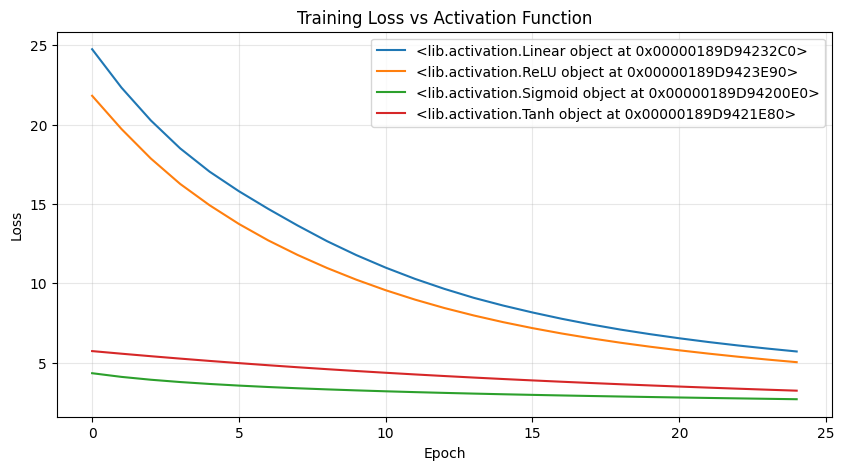

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

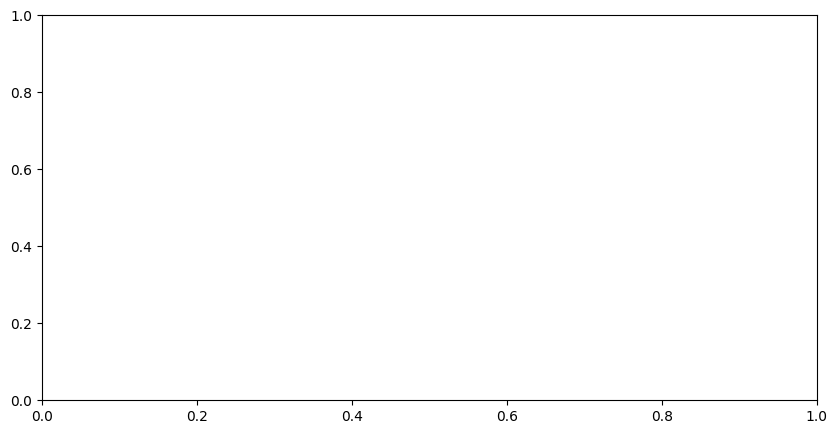

In [15]:
# Define base architecture
architecture = [784, 128, 10]

# Define activation functions to test (for hidden layers)
activation_functions = [Linear, ReLU, Sigmoid, Tanh]
activation_functions = [f() for f in activation_functions]

# Test different activation functions
activation_histories = []
activation_accuracies = []
activation_models = []

print("Testing activation functions...")
for activation in activation_functions:
    print(f"\nActivation: {activation}")
    
    # Create activations list (output layer uses Softmax)
    activations = [activation] + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_method=base_config['initializer']
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'] ** 2,
        validation_data=(X_val, y_val),
        learning_rate=base_config['learning_rate'],
        verbose=1
    )
    
    # Store results
    activation_histories.append(history)
    activation_models.append(model)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    activation_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
for i, history in enumerate(activation_histories):
    plt.plot(history['train_loss'], label=f"{activation_functions[i]}")
plt.title('Training Loss vs Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare test accuracies
plt.figure(figsize=(10, 5))
plt.bar([act for act in activation_functions], activation_accuracies)
plt.title('Test Accuracy vs Activation Function')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot weight distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(activation_models):
    plt.subplot(1, len(activation_models), i+1)
    weights = model.network.weights[0].flatten()
    plt.hist(weights, bins=30, alpha=0.7)
    plt.title(f"{activation_functions[i]} Weights")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot gradient distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(activation_models):
    plt.subplot(1, len(activation_models), i+1)
    gradients = model.network.gradients[0].flatten()
    plt.hist(gradients, bins=30, alpha=0.7)
    plt.title(f"{activation_functions[i]} Gradients")
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Testing learning rates...

Learning Rate: 0.001


Epoch 1/15: 100%|██████████| 125/125 [00:00<00:00, 186.23it/s, loss=22.8123]


Epoch 1/15 - 0.70s - loss: 22.8123 - val_loss: 22.8407


Epoch 2/15: 100%|██████████| 125/125 [00:00<00:00, 171.71it/s, loss=22.5764]


Epoch 2/15 - 0.76s - loss: 22.5764 - val_loss: 22.6183


Epoch 3/15: 100%|██████████| 125/125 [00:00<00:00, 219.69it/s, loss=22.3447]


Epoch 3/15 - 0.59s - loss: 22.3447 - val_loss: 22.3968


Epoch 4/15: 100%|██████████| 125/125 [00:00<00:00, 223.61it/s, loss=22.1154]


Epoch 4/15 - 0.58s - loss: 22.1154 - val_loss: 22.1771


Epoch 5/15: 100%|██████████| 125/125 [00:00<00:00, 216.64it/s, loss=21.8906]


Epoch 5/15 - 0.60s - loss: 21.8906 - val_loss: 21.9554


Epoch 6/15: 100%|██████████| 125/125 [00:00<00:00, 180.90it/s, loss=21.6690]


Epoch 6/15 - 0.72s - loss: 21.6690 - val_loss: 21.7360


Epoch 7/15: 100%|██████████| 125/125 [00:00<00:00, 211.50it/s, loss=21.4494]


Epoch 7/15 - 0.61s - loss: 21.4494 - val_loss: 21.5191


Epoch 8/15: 100%|██████████| 125/125 [00:00<00:00, 217.01it/s, loss=21.2330]


Epoch 8/15 - 0.60s - loss: 21.2330 - val_loss: 21.3049


Epoch 9/15: 100%|██████████| 125/125 [00:00<00:00, 205.59it/s, loss=21.0190]


Epoch 9/15 - 0.63s - loss: 21.0190 - val_loss: 21.0927


Epoch 10/15: 100%|██████████| 125/125 [00:00<00:00, 162.76it/s, loss=20.8095]


Epoch 10/15 - 0.79s - loss: 20.8095 - val_loss: 20.8820


Epoch 11/15: 100%|██████████| 125/125 [00:00<00:00, 184.63it/s, loss=20.6011]


Epoch 11/15 - 0.71s - loss: 20.6011 - val_loss: 20.6728


Epoch 12/15: 100%|██████████| 125/125 [00:00<00:00, 196.75it/s, loss=20.3946]


Epoch 12/15 - 0.66s - loss: 20.3946 - val_loss: 20.4658


Epoch 13/15: 100%|██████████| 125/125 [00:00<00:00, 166.00it/s, loss=20.1898]


Epoch 13/15 - 0.78s - loss: 20.1898 - val_loss: 20.2618


Epoch 14/15: 100%|██████████| 125/125 [00:00<00:00, 176.30it/s, loss=19.9861]


Epoch 14/15 - 0.73s - loss: 19.9861 - val_loss: 20.0617


Epoch 15/15: 100%|██████████| 125/125 [00:00<00:00, 223.89it/s, loss=19.7838]


Epoch 15/15 - 0.59s - loss: 19.7838 - val_loss: 19.8637
Test accuracy: 0.1234

Learning Rate: 0.01


Epoch 1/15: 100%|██████████| 125/125 [00:00<00:00, 225.75it/s, loss=21.8329]


Epoch 1/15 - 0.57s - loss: 21.8329 - val_loss: 20.8884


Epoch 2/15: 100%|██████████| 125/125 [00:00<00:00, 204.16it/s, loss=19.7292]


Epoch 2/15 - 0.63s - loss: 19.7292 - val_loss: 18.8961


Epoch 3/15: 100%|██████████| 125/125 [00:00<00:00, 207.42it/s, loss=17.8579]


Epoch 3/15 - 0.63s - loss: 17.8579 - val_loss: 17.1537


Epoch 4/15: 100%|██████████| 125/125 [00:00<00:00, 164.89it/s, loss=16.2584]


Epoch 4/15 - 0.78s - loss: 16.2584 - val_loss: 15.6751


Epoch 5/15: 100%|██████████| 125/125 [00:00<00:00, 212.22it/s, loss=14.9193]


Epoch 5/15 - 0.62s - loss: 14.9193 - val_loss: 14.3961


Epoch 6/15: 100%|██████████| 125/125 [00:00<00:00, 198.41it/s, loss=13.7449]


Epoch 6/15 - 0.65s - loss: 13.7449 - val_loss: 13.2553


Epoch 7/15: 100%|██████████| 125/125 [00:00<00:00, 203.58it/s, loss=12.7073]


Epoch 7/15 - 0.64s - loss: 12.7073 - val_loss: 12.2500


Epoch 8/15: 100%|██████████| 125/125 [00:00<00:00, 158.23it/s, loss=11.7902]


Epoch 8/15 - 0.81s - loss: 11.7902 - val_loss: 11.3586


Epoch 9/15: 100%|██████████| 125/125 [00:00<00:00, 159.24it/s, loss=10.9705]


Epoch 9/15 - 0.81s - loss: 10.9705 - val_loss: 10.5720


Epoch 10/15: 100%|██████████| 125/125 [00:00<00:00, 194.40it/s, loss=10.2333]


Epoch 10/15 - 0.67s - loss: 10.2333 - val_loss: 9.8699


Epoch 11/15: 100%|██████████| 125/125 [00:00<00:00, 220.45it/s, loss=9.5689]


Epoch 11/15 - 0.60s - loss: 9.5689 - val_loss: 9.2448


Epoch 12/15: 100%|██████████| 125/125 [00:00<00:00, 164.91it/s, loss=8.9746]


Epoch 12/15 - 0.78s - loss: 8.9746 - val_loss: 8.6971


Epoch 13/15: 100%|██████████| 125/125 [00:00<00:00, 207.68it/s, loss=8.4469]


Epoch 13/15 - 0.63s - loss: 8.4469 - val_loss: 8.2145


Epoch 14/15: 100%|██████████| 125/125 [00:00<00:00, 207.30it/s, loss=7.9767]


Epoch 14/15 - 0.63s - loss: 7.9767 - val_loss: 7.7821


Epoch 15/15: 100%|██████████| 125/125 [00:00<00:00, 189.11it/s, loss=7.5565]


Epoch 15/15 - 0.68s - loss: 7.5565 - val_loss: 7.3928
Test accuracy: 0.4590

Learning Rate: 0.1


Epoch 1/15: 100%|██████████| 125/125 [00:00<00:00, 168.39it/s, loss=15.2665]


Epoch 1/15 - 0.76s - loss: 15.2665 - val_loss: 9.7399


Epoch 2/15: 100%|██████████| 125/125 [00:00<00:00, 172.03it/s, loss=7.6348]


Epoch 2/15 - 0.75s - loss: 7.6348 - val_loss: 5.8506


Epoch 3/15: 100%|██████████| 125/125 [00:00<00:00, 192.01it/s, loss=5.0891]


Epoch 3/15 - 0.67s - loss: 5.0891 - val_loss: 4.3872


Epoch 4/15: 100%|██████████| 125/125 [00:00<00:00, 159.85it/s, loss=3.9294]


Epoch 4/15 - 0.82s - loss: 3.9294 - val_loss: 3.6725


Epoch 5/15: 100%|██████████| 125/125 [00:00<00:00, 141.70it/s, loss=3.2031]


Epoch 5/15 - 0.92s - loss: 3.2031 - val_loss: 3.1413


Epoch 6/15: 100%|██████████| 125/125 [00:00<00:00, 177.81it/s, loss=2.7035]


Epoch 6/15 - 0.73s - loss: 2.7035 - val_loss: 2.7865


Epoch 7/15: 100%|██████████| 125/125 [00:00<00:00, 158.63it/s, loss=2.3429]


Epoch 7/15 - 0.81s - loss: 2.3429 - val_loss: 2.5212


Epoch 8/15: 100%|██████████| 125/125 [00:00<00:00, 186.84it/s, loss=2.0769]


Epoch 8/15 - 0.70s - loss: 2.0769 - val_loss: 2.3293


Epoch 9/15: 100%|██████████| 125/125 [00:00<00:00, 156.23it/s, loss=1.8634]


Epoch 9/15 - 0.83s - loss: 1.8634 - val_loss: 2.1777


Epoch 10/15: 100%|██████████| 125/125 [00:00<00:00, 193.70it/s, loss=1.7013]


Epoch 10/15 - 0.68s - loss: 1.7013 - val_loss: 2.0569


Epoch 11/15: 100%|██████████| 125/125 [00:00<00:00, 198.10it/s, loss=1.5492]


Epoch 11/15 - 0.65s - loss: 1.5492 - val_loss: 1.9586


Epoch 12/15: 100%|██████████| 125/125 [00:00<00:00, 183.29it/s, loss=1.4284]


Epoch 12/15 - 0.71s - loss: 1.4284 - val_loss: 1.8911


Epoch 13/15: 100%|██████████| 125/125 [00:00<00:00, 161.29it/s, loss=1.3265]


Epoch 13/15 - 0.81s - loss: 1.3265 - val_loss: 1.8324


Epoch 14/15: 100%|██████████| 125/125 [00:00<00:00, 187.40it/s, loss=1.2381]


Epoch 14/15 - 0.69s - loss: 1.2381 - val_loss: 1.7583


Epoch 15/15: 100%|██████████| 125/125 [00:00<00:00, 184.09it/s, loss=1.1642]


Epoch 15/15 - 0.71s - loss: 1.1642 - val_loss: 1.7194
Test accuracy: 0.7964


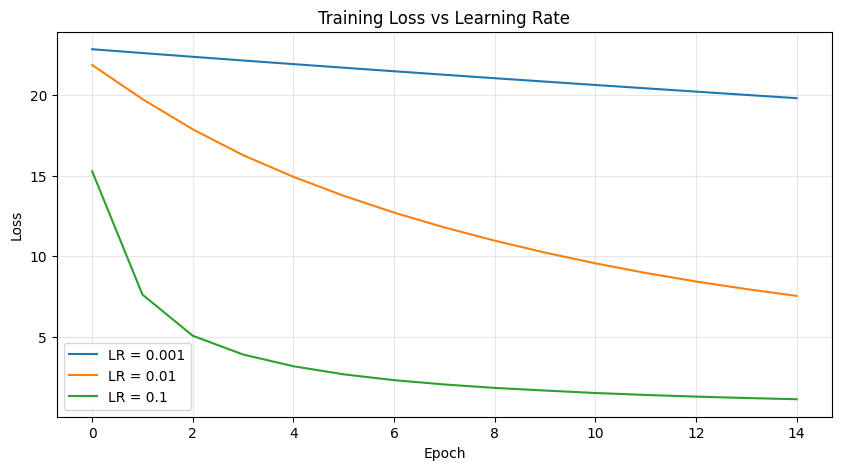

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


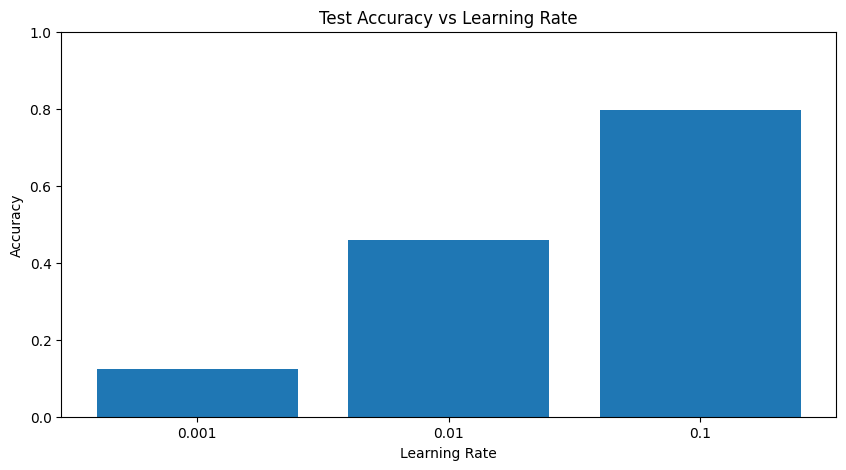

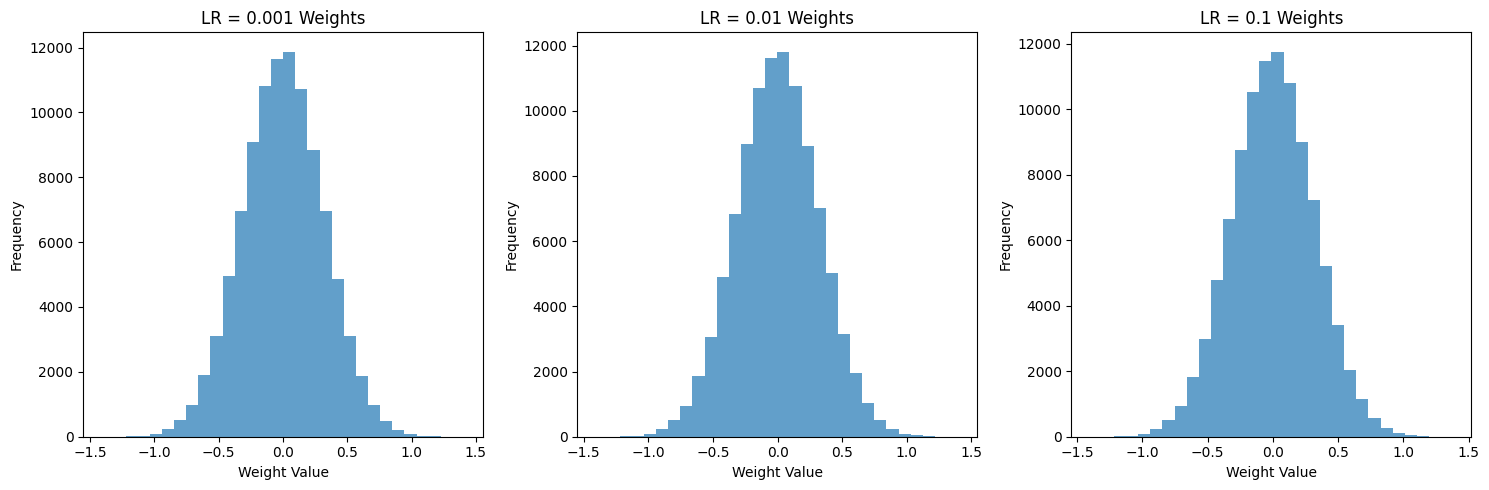

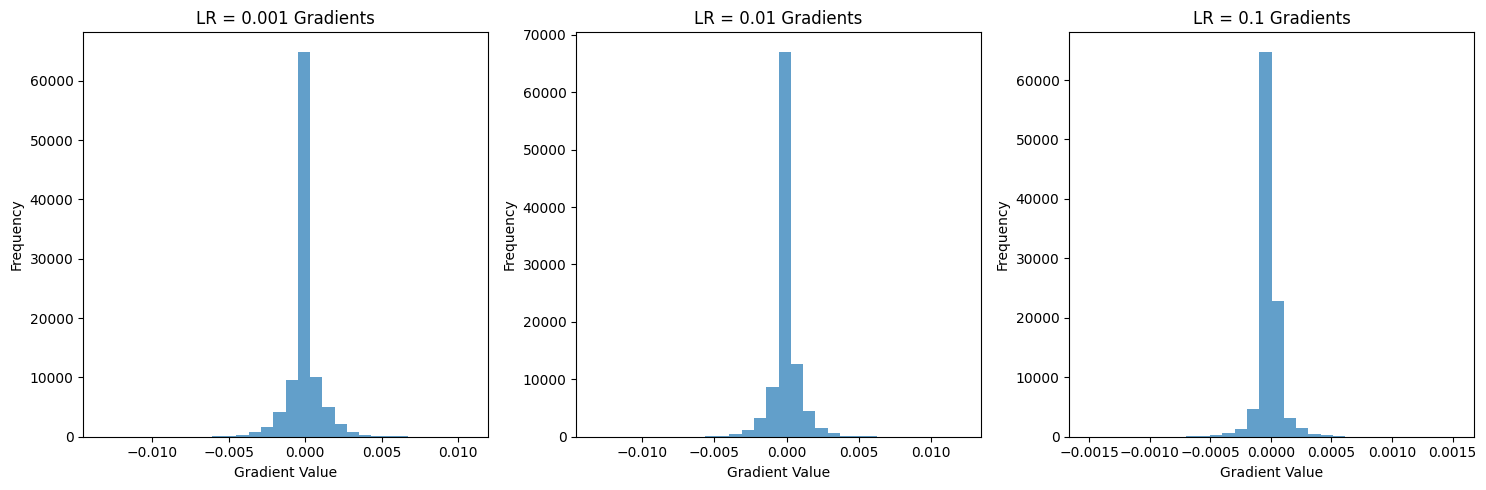

In [17]:
# Define base architecture
architecture = [784, 128, 10]

# Define learning rates to test
learning_rates = [0.001, 0.01, 0.1]

# Test different learning rates
lr_histories = []
lr_accuracies = []
lr_models = []

print("Testing learning rates...")
for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    
    # Create activations list (output layer uses Softmax)
    activations = [ReLU()] + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_method=base_config['initializer']
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'] * 3,
        learning_rate=lr,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    # Store results
    lr_histories.append(history)
    lr_models.append(model)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    lr_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
for i, history in enumerate(lr_histories):
    plt.plot(history['train_loss'], label=f"LR = {learning_rates[i]}")
plt.title('Training Loss vs Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare test accuracies
plt.figure(figsize=(10, 5))
plt.bar([str(lr) for lr in learning_rates], lr_accuracies)
plt.title('Test Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot weight distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(lr_models):
    plt.subplot(1, len(lr_models), i+1)
    weights = model.network.weights[0].flatten()
    plt.hist(weights, bins=30, alpha=0.7)
    plt.title(f"LR = {learning_rates[i]} Weights")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot gradient distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(lr_models):
    plt.subplot(1, len(lr_models), i+1)
    gradients = model.network.gradients[0].flatten()
    plt.hist(gradients, bins=30, alpha=0.7)
    plt.title(f"LR = {learning_rates[i]} Gradients")
    plt.xlabel("Gradient Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Testing weight initializers...

Initializer: Zero


Epoch 1/15:   0%|          | 0/125 [00:00<?, ?it/s]

Epoch 1/15: 100%|██████████| 125/125 [00:00<00:00, 156.84it/s, loss=2.3026]


Epoch 1/15 - 0.83s - loss: 2.3026 - val_loss: 2.3026


Epoch 2/15: 100%|██████████| 125/125 [00:00<00:00, 149.35it/s, loss=2.3026]


Epoch 2/15 - 0.87s - loss: 2.3026 - val_loss: 2.3026


Epoch 3/15: 100%|██████████| 125/125 [00:00<00:00, 234.25it/s, loss=2.3026]


Epoch 3/15 - 0.55s - loss: 2.3026 - val_loss: 2.3026


Epoch 4/15: 100%|██████████| 125/125 [00:00<00:00, 234.23it/s, loss=2.3025]


Epoch 4/15 - 0.55s - loss: 2.3025 - val_loss: 2.3025


Epoch 5/15: 100%|██████████| 125/125 [00:00<00:00, 215.53it/s, loss=2.3025]


Epoch 5/15 - 0.60s - loss: 2.3025 - val_loss: 2.3025


Epoch 6/15: 100%|██████████| 125/125 [00:00<00:00, 187.12it/s, loss=2.3025]


Epoch 6/15 - 0.69s - loss: 2.3025 - val_loss: 2.3025


Epoch 7/15: 100%|██████████| 125/125 [00:00<00:00, 224.85it/s, loss=2.3025]


Epoch 7/15 - 0.59s - loss: 2.3025 - val_loss: 2.3025


Epoch 8/15: 100%|██████████| 125/125 [00:00<00:00, 213.68it/s, loss=2.3025]


Epoch 8/15 - 0.60s - loss: 2.3025 - val_loss: 2.3025


Epoch 9/15: 100%|██████████| 125/125 [00:00<00:00, 213.05it/s, loss=2.3025]


Epoch 9/15 - 0.60s - loss: 2.3025 - val_loss: 2.3025


Epoch 10/15: 100%|██████████| 125/125 [00:00<00:00, 225.85it/s, loss=2.3025]


Epoch 10/15 - 0.59s - loss: 2.3025 - val_loss: 2.3025


Epoch 11/15: 100%|██████████| 125/125 [00:00<00:00, 183.92it/s, loss=2.3024]


Epoch 11/15 - 0.70s - loss: 2.3024 - val_loss: 2.3025


Epoch 12/15: 100%|██████████| 125/125 [00:00<00:00, 226.45it/s, loss=2.3024]


Epoch 12/15 - 0.57s - loss: 2.3024 - val_loss: 2.3025


Epoch 13/15: 100%|██████████| 125/125 [00:00<00:00, 191.42it/s, loss=2.3024]


Epoch 13/15 - 0.68s - loss: 2.3024 - val_loss: 2.3025


Epoch 14/15: 100%|██████████| 125/125 [00:00<00:00, 209.35it/s, loss=2.3024]


Epoch 14/15 - 0.62s - loss: 2.3024 - val_loss: 2.3025


Epoch 15/15: 100%|██████████| 125/125 [00:00<00:00, 180.38it/s, loss=2.3024]


Epoch 15/15 - 0.72s - loss: 2.3024 - val_loss: 2.3024
Test accuracy: 0.1161

Initializer: Uniform


Epoch 1/15: 100%|██████████| 125/125 [00:00<00:00, 227.34it/s, loss=2.3892]


Epoch 1/15 - 0.57s - loss: 2.3892 - val_loss: 2.3103


Epoch 2/15: 100%|██████████| 125/125 [00:00<00:00, 227.22it/s, loss=2.2958]


Epoch 2/15 - 0.57s - loss: 2.2958 - val_loss: 2.2237


Epoch 3/15: 100%|██████████| 125/125 [00:00<00:00, 168.24it/s, loss=2.2116]


Epoch 3/15 - 0.77s - loss: 2.2116 - val_loss: 2.1447


Epoch 4/15: 100%|██████████| 125/125 [00:00<00:00, 166.45it/s, loss=2.1348]


Epoch 4/15 - 0.80s - loss: 2.1348 - val_loss: 2.0720


Epoch 5/15: 100%|██████████| 125/125 [00:00<00:00, 231.07it/s, loss=2.0639]


Epoch 5/15 - 0.57s - loss: 2.0639 - val_loss: 2.0044


Epoch 6/15: 100%|██████████| 125/125 [00:00<00:00, 206.47it/s, loss=1.9980]


Epoch 6/15 - 0.63s - loss: 1.9980 - val_loss: 1.9412


Epoch 7/15: 100%|██████████| 125/125 [00:00<00:00, 229.36it/s, loss=1.9363]


Epoch 7/15 - 0.57s - loss: 1.9363 - val_loss: 1.8818


Epoch 8/15: 100%|██████████| 125/125 [00:00<00:00, 196.64it/s, loss=1.8783]


Epoch 8/15 - 0.66s - loss: 1.8783 - val_loss: 1.8257


Epoch 9/15: 100%|██████████| 125/125 [00:00<00:00, 186.01it/s, loss=1.8235]


Epoch 9/15 - 0.69s - loss: 1.8235 - val_loss: 1.7725


Epoch 10/15: 100%|██████████| 125/125 [00:00<00:00, 225.22it/s, loss=1.7715]


Epoch 10/15 - 0.58s - loss: 1.7715 - val_loss: 1.7221


Epoch 11/15: 100%|██████████| 125/125 [00:00<00:00, 224.82it/s, loss=1.7222]


Epoch 11/15 - 0.58s - loss: 1.7222 - val_loss: 1.6740


Epoch 12/15: 100%|██████████| 125/125 [00:00<00:00, 184.64it/s, loss=1.6753]


Epoch 12/15 - 0.70s - loss: 1.6753 - val_loss: 1.6283


Epoch 13/15: 100%|██████████| 125/125 [00:00<00:00, 185.46it/s, loss=1.6306]


Epoch 13/15 - 0.69s - loss: 1.6306 - val_loss: 1.5847


Epoch 14/15: 100%|██████████| 125/125 [00:00<00:00, 228.10it/s, loss=1.5880]


Epoch 14/15 - 0.57s - loss: 1.5880 - val_loss: 1.5431


Epoch 15/15: 100%|██████████| 125/125 [00:00<00:00, 223.62it/s, loss=1.5473]


Epoch 15/15 - 0.58s - loss: 1.5473 - val_loss: 1.5034
Test accuracy: 0.5979

Initializer: Normal


Epoch 1/15: 100%|██████████| 125/125 [00:00<00:00, 196.54it/s, loss=21.8315]


Epoch 1/15 - 0.65s - loss: 21.8315 - val_loss: 20.8919


Epoch 2/15: 100%|██████████| 125/125 [00:00<00:00, 214.40it/s, loss=19.7346]


Epoch 2/15 - 0.61s - loss: 19.7346 - val_loss: 18.8998


Epoch 3/15: 100%|██████████| 125/125 [00:00<00:00, 178.32it/s, loss=17.8522]


Epoch 3/15 - 0.72s - loss: 17.8522 - val_loss: 17.1375


Epoch 4/15: 100%|██████████| 125/125 [00:00<00:00, 221.63it/s, loss=16.2466]


Epoch 4/15 - 0.59s - loss: 16.2466 - val_loss: 15.6737


Epoch 5/15: 100%|██████████| 125/125 [00:00<00:00, 175.07it/s, loss=14.9155]


Epoch 5/15 - 0.73s - loss: 14.9155 - val_loss: 14.3856


Epoch 6/15: 100%|██████████| 125/125 [00:00<00:00, 195.62it/s, loss=13.7380]


Epoch 6/15 - 0.66s - loss: 13.7380 - val_loss: 13.2482


Epoch 7/15: 100%|██████████| 125/125 [00:00<00:00, 158.01it/s, loss=12.7051]


Epoch 7/15 - 0.81s - loss: 12.7051 - val_loss: 12.2424


Epoch 8/15: 100%|██████████| 125/125 [00:00<00:00, 157.12it/s, loss=11.7878]


Epoch 8/15 - 0.83s - loss: 11.7878 - val_loss: 11.3511


Epoch 9/15: 100%|██████████| 125/125 [00:00<00:00, 193.62it/s, loss=10.9685]


Epoch 9/15 - 0.67s - loss: 10.9685 - val_loss: 10.5636


Epoch 10/15: 100%|██████████| 125/125 [00:00<00:00, 182.59it/s, loss=10.2286]


Epoch 10/15 - 0.71s - loss: 10.2286 - val_loss: 9.8621


Epoch 11/15: 100%|██████████| 125/125 [00:00<00:00, 152.29it/s, loss=9.5636]


Epoch 11/15 - 0.85s - loss: 9.5636 - val_loss: 9.2418


Epoch 12/15: 100%|██████████| 125/125 [00:00<00:00, 183.82it/s, loss=8.9715]


Epoch 12/15 - 0.71s - loss: 8.9715 - val_loss: 8.6975


Epoch 13/15: 100%|██████████| 125/125 [00:00<00:00, 188.17it/s, loss=8.4445]


Epoch 13/15 - 0.69s - loss: 8.4445 - val_loss: 8.2111


Epoch 14/15: 100%|██████████| 125/125 [00:00<00:00, 217.77it/s, loss=7.9766]


Epoch 14/15 - 0.60s - loss: 7.9766 - val_loss: 7.7805


Epoch 15/15: 100%|██████████| 125/125 [00:00<00:00, 148.10it/s, loss=7.5567]


Epoch 15/15 - 0.87s - loss: 7.5567 - val_loss: 7.3945
Test accuracy: 0.4594


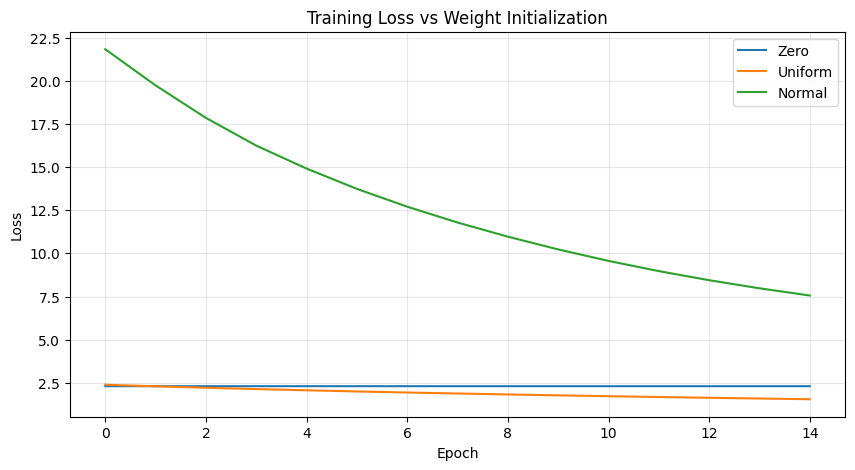

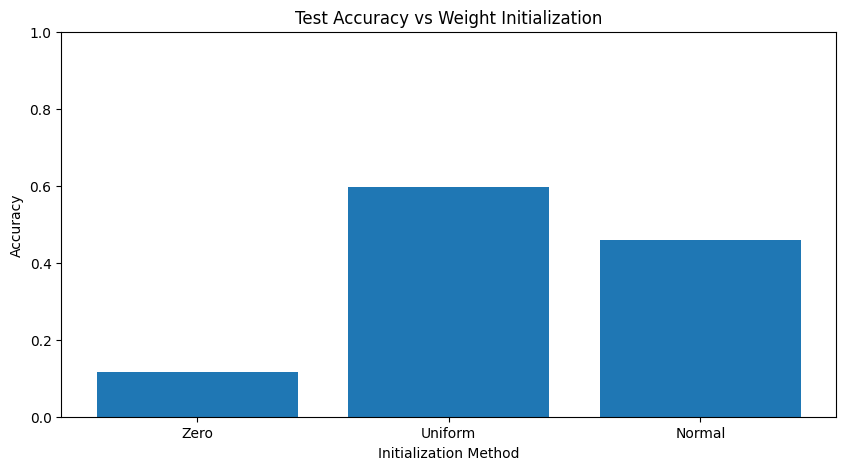

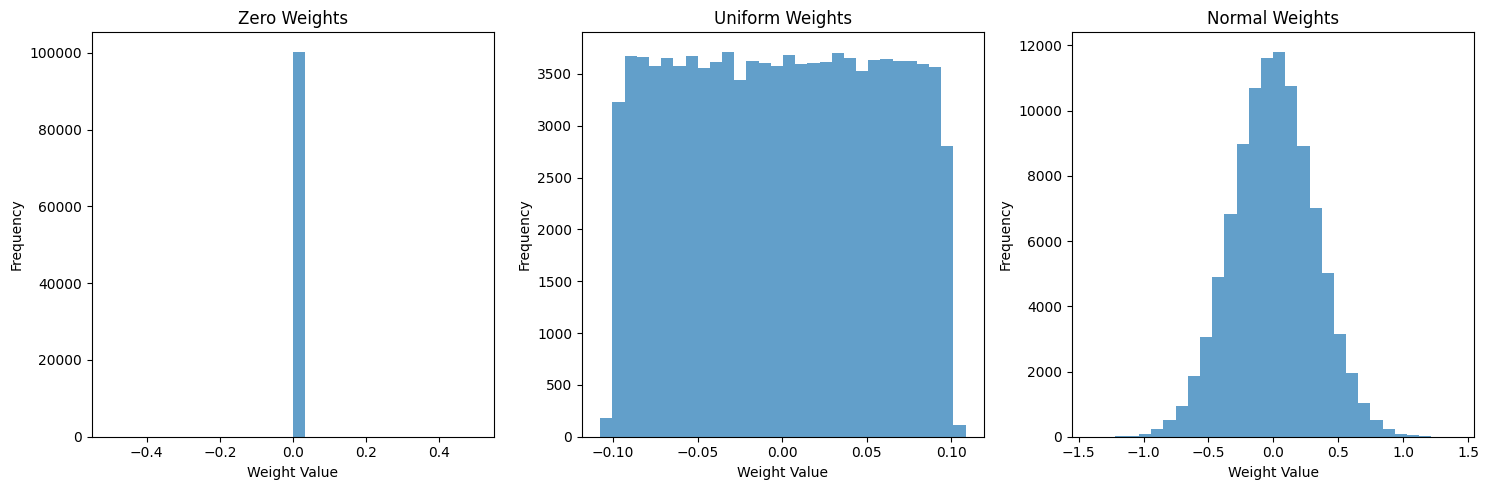

In [20]:
# Define base architecture
architecture = [784, 128, 10]

# Define initializers to test
initializers = [
    ZeroInitializer(),
    UniformInitializer(low=-0.1, high=0.1, seed=42),
    NormalInitializer(mean=0, var=0.1, seed=42)
]
initializer_names = ["Zero", "Uniform", "Normal"]

# Test different initializers
init_histories = []
init_accuracies = []
init_models = []

print("Testing weight initializers...")
for i, initializer in enumerate(initializers):
    print(f"\nInitializer: {initializer_names[i]}")
    
    # Create activations list (output layer uses Softmax)
    activations = [ReLU()] + [Softmax()]
    
    # Create neural network
    network = NeuralNetwork(
        node_counts=architecture,
        activations=activations,
        loss_function=base_config['loss_function'],
        initialize_method=initializer
    )
    
    # Create FFNN model
    model = FFNN(network)
    
    # Train the model
    history = model.fit(
        X_train_ffnn, y_train_ffnn,
        batch_size=base_config['batch_size'],
        epochs=base_config['epochs'] * 3,
        validation_data=(X_val, y_val),
        verbose=1, 
        learning_rate=base_config['learning_rate']
    )
    
    # Store results
    init_histories.append(history)
    init_models.append(model)
    
    # Evaluate on test set
    accuracy = evaluate_model(model, X_test, y_test_onehot)
    init_accuracies.append(accuracy)
    print(f"Test accuracy: {accuracy:.4f}")

# Plot training loss
plt.figure(figsize=(10, 5))
for i, history in enumerate(init_histories):
    plt.plot(history['train_loss'], label=f"{initializer_names[i]}")
plt.title('Training Loss vs Weight Initialization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Compare test accuracies
plt.figure(figsize=(10, 5))
plt.bar(initializer_names, init_accuracies)
plt.title('Test Accuracy vs Weight Initialization')
plt.xlabel('Initialization Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot initial weight distributions
plt.figure(figsize=(15, 5))
for i, model in enumerate(init_models):
    plt.subplot(1, len(init_models), i+1)
    weights = model.network.weights[0].flatten()
    plt.hist(weights, bins=30, alpha=0.7)
    plt.title(f"{initializer_names[i]} Weights")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Training custom FFNN model...


Epoch 1/50:   0%|          | 0/125 [00:00<?, ?it/s, loss=0.8778]

Epoch 1/50: 100%|██████████| 125/125 [00:00<00:00, 165.38it/s, loss=24.7509]


Epoch 1/50 - 0.79s - loss: 24.7509 - val_loss: 23.6640


Epoch 2/50: 100%|██████████| 125/125 [00:00<00:00, 204.25it/s, loss=22.3304]


Epoch 2/50 - 0.63s - loss: 22.3304 - val_loss: 21.4887


Epoch 3/50: 100%|██████████| 125/125 [00:00<00:00, 183.55it/s, loss=20.2800]


Epoch 3/50 - 0.70s - loss: 20.2800 - val_loss: 19.5945


Epoch 4/50: 100%|██████████| 125/125 [00:00<00:00, 232.77it/s, loss=18.5063]


Epoch 4/50 - 0.56s - loss: 18.5063 - val_loss: 17.9848


Epoch 5/50: 100%|██████████| 125/125 [00:00<00:00, 228.52it/s, loss=17.0409]


Epoch 5/50 - 0.57s - loss: 17.0409 - val_loss: 16.6754


Epoch 6/50: 100%|██████████| 125/125 [00:00<00:00, 182.75it/s, loss=15.8143]


Epoch 6/50 - 0.71s - loss: 15.8143 - val_loss: 15.5170


Epoch 7/50: 100%|██████████| 125/125 [00:00<00:00, 229.78it/s, loss=14.7063]


Epoch 7/50 - 0.58s - loss: 14.7063 - val_loss: 14.4254


Epoch 8/50: 100%|██████████| 125/125 [00:00<00:00, 217.81it/s, loss=13.6719]


Epoch 8/50 - 0.60s - loss: 13.6719 - val_loss: 13.4265


Epoch 9/50: 100%|██████████| 125/125 [00:00<00:00, 236.74it/s, loss=12.6997]


Epoch 9/50 - 0.54s - loss: 12.6997 - val_loss: 12.4856


Epoch 10/50: 100%|██████████| 125/125 [00:00<00:00, 199.73it/s, loss=11.8186]


Epoch 10/50 - 0.67s - loss: 11.8186 - val_loss: 11.6313


Epoch 11/50: 100%|██████████| 125/125 [00:00<00:00, 226.04it/s, loss=11.0322]


Epoch 11/50 - 0.58s - loss: 11.0322 - val_loss: 10.8192


Epoch 12/50: 100%|██████████| 125/125 [00:00<00:00, 215.52it/s, loss=10.3174]


Epoch 12/50 - 0.60s - loss: 10.3174 - val_loss: 10.1067


Epoch 13/50: 100%|██████████| 125/125 [00:00<00:00, 227.28it/s, loss=9.6767]


Epoch 13/50 - 0.57s - loss: 9.6767 - val_loss: 9.4924


Epoch 14/50: 100%|██████████| 125/125 [00:00<00:00, 183.79it/s, loss=9.1144]


Epoch 14/50 - 0.70s - loss: 9.1144 - val_loss: 8.9544


Epoch 15/50: 100%|██████████| 125/125 [00:00<00:00, 193.80it/s, loss=8.6258]


Epoch 15/50 - 0.67s - loss: 8.6258 - val_loss: 8.4837


Epoch 16/50: 100%|██████████| 125/125 [00:00<00:00, 231.92it/s, loss=8.1856]


Epoch 16/50 - 0.56s - loss: 8.1856 - val_loss: 8.0649


Epoch 17/50: 100%|██████████| 125/125 [00:00<00:00, 224.41it/s, loss=7.7845]


Epoch 17/50 - 0.58s - loss: 7.7845 - val_loss: 7.6943


Epoch 18/50: 100%|██████████| 125/125 [00:00<00:00, 187.69it/s, loss=7.4216]


Epoch 18/50 - 0.70s - loss: 7.4216 - val_loss: 7.3661


Epoch 19/50: 100%|██████████| 125/125 [00:00<00:00, 164.26it/s, loss=7.0971]


Epoch 19/50 - 0.79s - loss: 7.0971 - val_loss: 7.0794


Epoch 20/50: 100%|██████████| 125/125 [00:00<00:00, 195.31it/s, loss=6.8067]


Epoch 20/50 - 0.67s - loss: 6.8067 - val_loss: 6.8205


Epoch 21/50: 100%|██████████| 125/125 [00:00<00:00, 227.27it/s, loss=6.5445]


Epoch 21/50 - 0.58s - loss: 6.5445 - val_loss: 6.5867


Epoch 22/50: 100%|██████████| 125/125 [00:00<00:00, 221.22it/s, loss=6.3071]


Epoch 22/50 - 0.59s - loss: 6.3071 - val_loss: 6.3729


Epoch 23/50: 100%|██████████| 125/125 [00:00<00:00, 218.15it/s, loss=6.0911]


Epoch 23/50 - 0.60s - loss: 6.0911 - val_loss: 6.1685


Epoch 24/50: 100%|██████████| 125/125 [00:00<00:00, 184.10it/s, loss=5.8953]


Epoch 24/50 - 0.70s - loss: 5.8953 - val_loss: 5.9740


Epoch 25/50: 100%|██████████| 125/125 [00:00<00:00, 210.23it/s, loss=5.7134]


Epoch 25/50 - 0.63s - loss: 5.7134 - val_loss: 5.7918


Epoch 26/50: 100%|██████████| 125/125 [00:00<00:00, 215.19it/s, loss=5.5453]


Epoch 26/50 - 0.60s - loss: 5.5453 - val_loss: 5.6217


Epoch 27/50: 100%|██████████| 125/125 [00:00<00:00, 206.30it/s, loss=5.3846]


Epoch 27/50 - 0.63s - loss: 5.3846 - val_loss: 5.4635


Epoch 28/50: 100%|██████████| 125/125 [00:00<00:00, 182.44it/s, loss=5.2343]


Epoch 28/50 - 0.71s - loss: 5.2343 - val_loss: 5.3187


Epoch 29/50: 100%|██████████| 125/125 [00:00<00:00, 181.16it/s, loss=5.0957]


Epoch 29/50 - 0.71s - loss: 5.0957 - val_loss: 5.1824


Epoch 30/50: 100%|██████████| 125/125 [00:00<00:00, 191.71it/s, loss=4.9619]


Epoch 30/50 - 0.69s - loss: 4.9619 - val_loss: 5.0575


Epoch 31/50: 100%|██████████| 125/125 [00:00<00:00, 190.55it/s, loss=4.8347]


Epoch 31/50 - 0.68s - loss: 4.8347 - val_loss: 4.9425


Epoch 32/50: 100%|██████████| 125/125 [00:00<00:00, 152.60it/s, loss=4.7116]


Epoch 32/50 - 0.85s - loss: 4.7116 - val_loss: 4.8384


Epoch 33/50: 100%|██████████| 125/125 [00:00<00:00, 183.56it/s, loss=4.5954]


Epoch 33/50 - 0.70s - loss: 4.5954 - val_loss: 4.7436


Epoch 34/50: 100%|██████████| 125/125 [00:00<00:00, 217.02it/s, loss=4.4860]


Epoch 34/50 - 0.60s - loss: 4.4860 - val_loss: 4.6570


Epoch 35/50: 100%|██████████| 125/125 [00:00<00:00, 209.03it/s, loss=4.3838]


Epoch 35/50 - 0.62s - loss: 4.3838 - val_loss: 4.5784


Epoch 36/50: 100%|██████████| 125/125 [00:00<00:00, 168.69it/s, loss=4.2896]


Epoch 36/50 - 0.77s - loss: 4.2896 - val_loss: 4.5050


Epoch 37/50: 100%|██████████| 125/125 [00:00<00:00, 176.80it/s, loss=4.2011]


Epoch 37/50 - 0.74s - loss: 4.2011 - val_loss: 4.4357


Epoch 38/50: 100%|██████████| 125/125 [00:00<00:00, 215.46it/s, loss=4.1199]


Epoch 38/50 - 0.60s - loss: 4.1199 - val_loss: 4.3700


Epoch 39/50: 100%|██████████| 125/125 [00:00<00:00, 202.49it/s, loss=4.0439]


Epoch 39/50 - 0.64s - loss: 4.0439 - val_loss: 4.3058


Epoch 40/50: 100%|██████████| 125/125 [00:00<00:00, 213.67it/s, loss=3.9714]


Epoch 40/50 - 0.60s - loss: 3.9714 - val_loss: 4.2479


Epoch 41/50: 100%|██████████| 125/125 [00:00<00:00, 167.34it/s, loss=3.9016]


Epoch 41/50 - 0.76s - loss: 3.9016 - val_loss: 4.1945


Epoch 42/50: 100%|██████████| 125/125 [00:00<00:00, 222.02it/s, loss=3.8360]


Epoch 42/50 - 0.59s - loss: 3.8360 - val_loss: 4.1438


Epoch 43/50: 100%|██████████| 125/125 [00:00<00:00, 233.44it/s, loss=3.7728]


Epoch 43/50 - 0.56s - loss: 3.7728 - val_loss: 4.0979


Epoch 44/50: 100%|██████████| 125/125 [00:00<00:00, 233.21it/s, loss=3.7144]


Epoch 44/50 - 0.55s - loss: 3.7144 - val_loss: 4.0548


Epoch 45/50: 100%|██████████| 125/125 [00:00<00:00, 194.40it/s, loss=3.6591]


Epoch 45/50 - 0.67s - loss: 3.6591 - val_loss: 4.0134


Epoch 46/50: 100%|██████████| 125/125 [00:00<00:00, 170.30it/s, loss=3.6053]


Epoch 46/50 - 0.76s - loss: 3.6053 - val_loss: 3.9727


Epoch 47/50: 100%|██████████| 125/125 [00:00<00:00, 198.41it/s, loss=3.5514]


Epoch 47/50 - 0.65s - loss: 3.5514 - val_loss: 3.9340


Epoch 48/50: 100%|██████████| 125/125 [00:00<00:00, 195.75it/s, loss=3.4993]


Epoch 48/50 - 0.66s - loss: 3.4993 - val_loss: 3.8960


Epoch 49/50: 100%|██████████| 125/125 [00:00<00:00, 174.93it/s, loss=3.4462]


Epoch 49/50 - 0.74s - loss: 3.4462 - val_loss: 3.8587


Epoch 50/50: 100%|██████████| 125/125 [00:00<00:00, 160.44it/s, loss=3.3937]


Epoch 50/50 - 0.81s - loss: 3.3937 - val_loss: 3.8213

Training sklearn MLPClassifier...
First few training labels: [5 9 5 8 3]
Label type: <class 'numpy.ndarray'> int64
Iteration 1, loss = 0.58612142

Model Comparison:
Custom FFNN accuracy: 0.7529
sklearn MLP accuracy: 0.8947


d:\GitHub\Tugas-Besar-I-ML\.env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


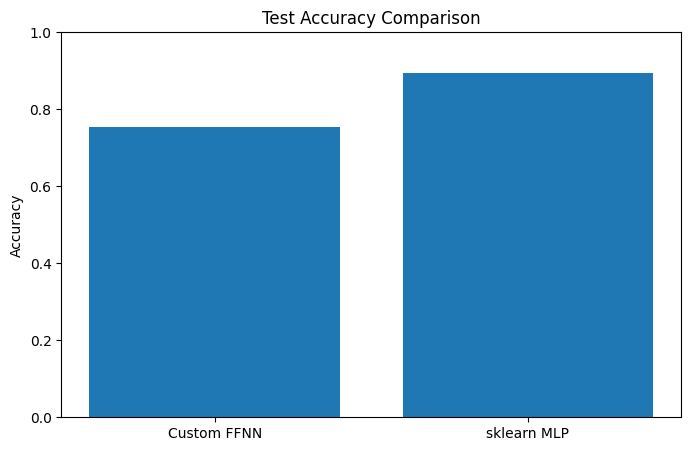

In [ ]:
# Import sklearn's MLPClassifier
from sklearn.neural_network import MLPClassifier

# Define architecture and parameters
architecture = [784, 128, 10]
learning_rate = 0.01
batch_size = 32
epochs = 5

# Create our custom FFNN
activations = [Linear()] + [Softmax()]
network = NeuralNetwork(
    node_counts=architecture,
    activations=activations,
    loss_function=CCE(),
    initialize_method=NormalInitializer(seed=42)
)
custom_model = FFNN(network)

# Train our custom model
print("Training custom FFNN model...")
custom_history = custom_model.fit(
    X_train_ffnn, y_train_ffnn,
    batch_size=batch_size,
    epochs=epochs*20,
    validation_data=(X_val, y_val),
    verbose=1, 
    learning_rate=learning_rate
)

# Create sklearn MLPClassifier
sklearn_model = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='sgd',
    alpha=0.0001,
    batch_size=batch_size,
    learning_rate_init=learning_rate,
    max_iter=epochs//5,
    random_state=42,
    verbose=True
)

# Train sklearn model with correct target format
print("\nTraining sklearn MLPClassifier...")
# Convert string labels to integers if needed
y_train_int = np.array(y_train).astype(int) if isinstance(y_train[0], str) else np.array(y_train, dtype=int)
y_test_int = np.array(y_test).astype(int) if isinstance(y_test[0], str) else np.array(y_test, dtype=int)

# Check first few labels to debug
print(f"First few training labels: {y_train_int[:5]}")
print(f"Label type: {type(y_train_int)} {y_train_int.dtype}")

# Fit the model
sklearn_model.fit(X_train, y_train_int)

# Evaluate both models
custom_accuracy = evaluate_model(custom_model, X_test, y_test_onehot)
sklearn_predictions = sklearn_model.predict(X_test)
sklearn_accuracy = np.mean(sklearn_predictions == y_test_int)

print("\nModel Comparison:")
print(f"Custom FFNN accuracy: {custom_accuracy:.4f}")
print(f"sklearn MLP accuracy: {sklearn_accuracy:.4f}")

# Compare accuracies
plt.figure(figsize=(8, 5))
plt.bar(['Custom FFNN', 'sklearn MLP'], [custom_accuracy, sklearn_accuracy])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()